### Analisando dados de Criminalidade de Sorocaba

## Objetivo: Criar um unico documento com as ocorrências dividas por DP (regiões de Sorocaba)

## Grupo 04:
  * Caio Cesar Tascano
  * Douglas
  * Gabriel
  * Matheus
  * Vinicius

## Fonte: https://www.ssp.sp.gov.br/estatistica/dados-mensais






# Baixando dados através do Pandas


O uso do pandas em Python é essencial para manipulação e análise de dados após o download de arquivos. Apesar de não ser projetado para baixar arquivos diretamente, o pandas integra-se eficientemente com bibliotecas como requests ou urllib, permitindo o carregamento e processamento de formatos como CSV, Excel e JSON. Sua versatilidade facilita a limpeza, transformação e análise dos dados, além de automatizar fluxos de trabalho, otimizando tarefas como filtragem, agregação e exportação para formatos estruturados. Essa integração aprimora a eficiência em projetos de ciência de dados.

In [2]:
# Importando bibliotecas
!pip install -q pandera
import pandas as pd
import pandera as pa
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 5.0 MB/s eta 0:00:00


# Looping para acessar dados.

O código apresentado utiliza um loop para organizar múltiplos arquivos Excel em um único dicionário Python. Inicialmente, cria-se um dicionário vazio arq_dict para armazenar os dados. O loop for percorre os números de 1 a 12 (representando os meses) e, em cada iteração, lê um arquivo Excel utilizando o pandas com o método pd.read_excel. O nome do arquivo é dinâmico, construído com f'sorocaba_dp_{arq}.xlsx', onde {arq} é substituído pelo número correspondente. Em seguida, os dados do arquivo são armazenados no dicionário com uma chave correspondente ao nome do arquivo. Por exemplo, arq_dict['sorocaba_dp_1'] acessa os dados do arquivo do mês 1. Esse método é eficiente para consolidar múltiplos conjuntos de dados estruturados em um único objeto para análise posterior.

In [4]:
# Looping para dados em um unico dicionario
arq_dict = {}
for arq in range(1,13):
  arquivo = pd.read_excel(f'sorocaba_dp_{arq}.xlsx')
  arq_dict[f'sorocaba_dp_{arq}'] = arquivo

arq_dict['sorocaba_dp_1']

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

,Natureza,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,HOMICÍDIO DOLOSO (2),0,0,1,1,0,0,0,0,2,0,0,1,5
1,Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO (3),0,0,1,1,0,0,0,0,2,0,0,1,5
2,HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO POR ACIDENTE...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOMICÍDIO CULPOSO POR ACIDENTE DE TRÂNSITO,0,0,0,0,1,0,1,0,0,0,0,0,2
5,HOMICÍDIO CULPOSO OUTROS,0,0,0,0,0,0,0,0,0,0,0,0,0
6,TENTATIVA DE HOMICÍDIO,0,0,1,0,0,0,0,0,1,0,0,2,4
7,LESÃO CORPORAL SEGUIDA DE MORTE,0,0,0,0,0,0,0,0,0,0,0,0,0
8,LESÃO CORPORAL DOLOSA,16,7,16,22,13,11,11,16,10,16,11,11,160
9,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,4,1,8,1,7,3,3,4,8,3,6,4,52


# Removendo o que não interessa


O código apresentado cria um dicionário chamado dic_ocorrencias para armazenar o total de ocorrências de uma coluna específica de cada arquivo previamente carregado no dicionário arq_dict.

No loop, percorre-se cada chave de arq_dict, que representa os diferentes arquivos Excel já lidos. Para cada arquivo, o código seleciona a 14ª coluna (iloc[:, 13], lembrando que o índice é zero-based) e calcula a soma de seus valores com o método .sum(). Esse total é então armazenado no dicionário dic_ocorrencias, onde a chave é o nome do arquivo prefixado com DP_ e o valor é o somatório das ocorrências.

Por exemplo, se arq_dict contiver arquivos representando ocorrências mensais de delegacias, dic_ocorrencias consolidará os totais mensais por delegacia em um único dicionário. Isso facilita o acesso e a análise de dados agregados.

In [5]:
# Nova variavel dic_ocorrencias
dic_ocorrencias = {}

#Looping para criar dicionário com ocorrencias totais
for arq in arq_dict:
  dic_ocorrencias[f'DP_{arq}'] = arq_dict[arq].iloc[:, 13].sum()

dic_ocorrencias

{'DP_sorocaba_dp_1': 1529,
 'DP_sorocaba_dp_2': 1165,
 'DP_sorocaba_dp_3': 1033.301,
 'DP_sorocaba_dp_4': 1263,
 'DP_sorocaba_dp_5': 645.025,
 'DP_sorocaba_dp_6': 1203,
 'DP_sorocaba_dp_7': 150,
 'DP_sorocaba_dp_8': 1856.659,
 'DP_sorocaba_dp_9': 1221.498,
 'DP_sorocaba_dp_10': 572,
 'DP_sorocaba_dp_11': 2244,
 'DP_sorocaba_dp_12': 0}

# Criando novo dataframe com ocorrencias totais por DP

O código transforma o dicionário dic_ocorrencias, que armazena os totais de ocorrências por delegacia, em um DataFrame utilizando o pandas, permitindo análises mais estruturadas. Inicialmente, emprega-se o método pd.DataFrame.from_dict() para converter o dicionário em um DataFrame, configurando as chaves como índices e os valores na coluna 'Valor'. Em seguida, o índice é redefinido com o método .reset_index(), reorganizando-o como uma coluna regular. As colunas são renomeadas para 'Departamento de Policia' e 'Ocorrencias_Totais' para maior clareza. Por fim, os valores na coluna de ocorrências são convertidos para o tipo inteiro com .astype(int), assegurando consistência para operações numéricas. Este DataFrame facilita a visualização e análise dos dados, promovendo uma organização eficiente para exploração e relatórios.

In [7]:
## Criando um dataframe para manipulação pandera
dataframe_ocorrencias = pd.DataFrame.from_dict(dic_ocorrencias, orient='index', columns=['Valor'])
## Resetando Index para facilitar visuaização
dataframe_ocorrencias.reset_index(inplace=True)
dataframe_ocorrencias.columns = ['Departamento de Policia', 'Ocorrencias_Totais']

dataframe_ocorrencias['Ocorrencias_Totais'] = dataframe_ocorrencias['Ocorrencias_Totais'].astype(int) ## Transformando em numeros inteiros
dataframe_ocorrencias['Bairros_Regiões'] = ['Vila Progresso', 'Vila Haro', 'Jd. Paulistano', 'Vila Trujilo', 'Vila Santa Terezinha', 'Éden', 'Brigadeiro Tobias', 'Vila Helena', ' Jd. Vera Cruz I', 'Parada do Alto', 'Jd. Altos do Itavuvu', 'Jd. Emilia']
dataframe_ocorrencias



,Departamento de Policia,Ocorrencias_Totais,Bairros_Regiões
0,DP_sorocaba_dp_1,1529,Vila Progresso
1,DP_sorocaba_dp_2,1165,Vila Haro
2,DP_sorocaba_dp_3,1033,Jd. Paulistano
3,DP_sorocaba_dp_4,1263,Vila Trujilo
4,DP_sorocaba_dp_5,645,Vila Santa Terezinha
5,DP_sorocaba_dp_6,1203,Éden
6,DP_sorocaba_dp_7,150,Brigadeiro Tobias
7,DP_sorocaba_dp_8,1856,Vila Helena
8,DP_sorocaba_dp_9,1221,Jd. Vera Cruz I
9,DP_sorocaba_dp_10,572,Parada do Alto


# Validação dos dados através do pandera

A estrutura apresentada define um esquema de validação para um DataFrame utilizando a biblioteca pandera, que é amplamente empregada para garantir a integridade e a conformidade dos dados em análises. O esquema é construído com a classe pa.DataFrameSchema, especificando as colunas esperadas no DataFrame. A coluna 'Departamento de Policia' é definida como uma string (pa.String), enquanto 'Ocorrencias_Totais' é definida como um número inteiro (pa.Int). Após a definição do esquema, o método .validate() é aplicado ao DataFrame dataframe_ocorrencias, assegurando que os dados atendem aos requisitos declarados. Esse processo é essencial em fluxos de trabalho de ciência de dados para detectar inconsistências ou anomalias nos dados, garantindo robustez nas etapas subsequentes de análise.

In [10]:
schema = pa.DataFrameSchema(
    columns = {
        "Departamento de Policia":pa.Column(pa.String),
        "Ocorrencias_Totais":pa.Column(pa.Int),
        "Bairros_Regiões":pa.Column(pa.String)
    }
)

schema.validate(dataframe_ocorrencias)

,Departamento de Policia,Ocorrencias_Totais,Bairros_Regiões
0,DP_sorocaba_dp_1,1529,Vila Progresso
1,DP_sorocaba_dp_2,1165,Vila Haro
2,DP_sorocaba_dp_3,1033,Jd. Paulistano
3,DP_sorocaba_dp_4,1263,Vila Trujilo
4,DP_sorocaba_dp_5,645,Vila Santa Terezinha
5,DP_sorocaba_dp_6,1203,Éden
6,DP_sorocaba_dp_7,150,Brigadeiro Tobias
7,DP_sorocaba_dp_8,1856,Vila Helena
8,DP_sorocaba_dp_9,1221,Jd. Vera Cruz I
9,DP_sorocaba_dp_10,572,Parada do Alto


## Gerando graficos

# Gráfico de barras

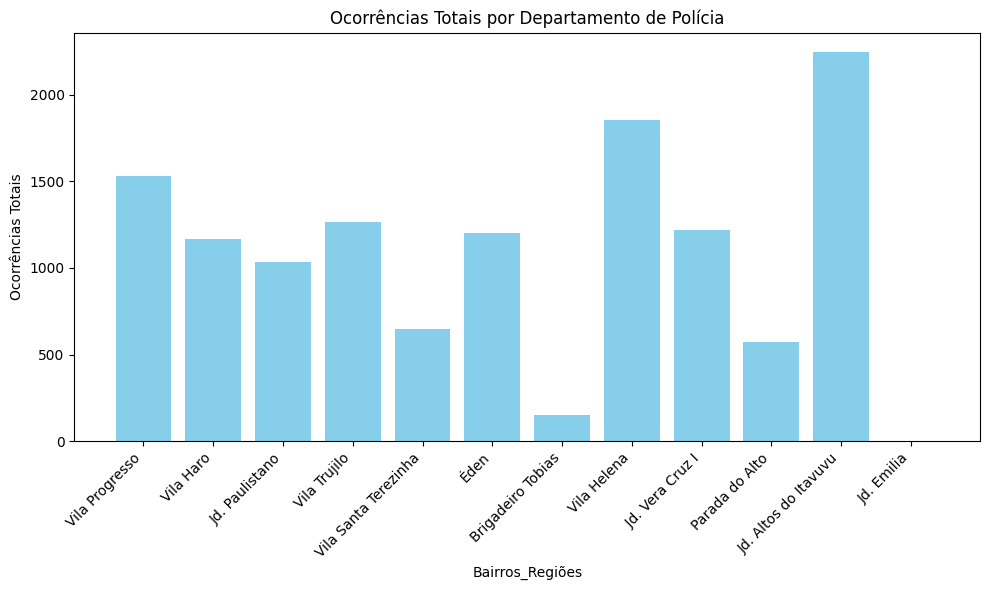

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(dataframe_ocorrencias['Bairros_Regiões'], dataframe_ocorrencias['Ocorrencias_Totais'], color='skyblue')
plt.xlabel('Bairros_Regiões')
plt.ylabel('Ocorrências Totais')
plt.title('Ocorrências Totais por Departamento de Polícia')
plt.xticks(rotation=45, ha="right")  # Rotaciona os rótulos no eixo X
plt.tight_layout()  # Ajuste para evitar sobreposição dos rótulos
plt.show()

# Gráfico de Linhas

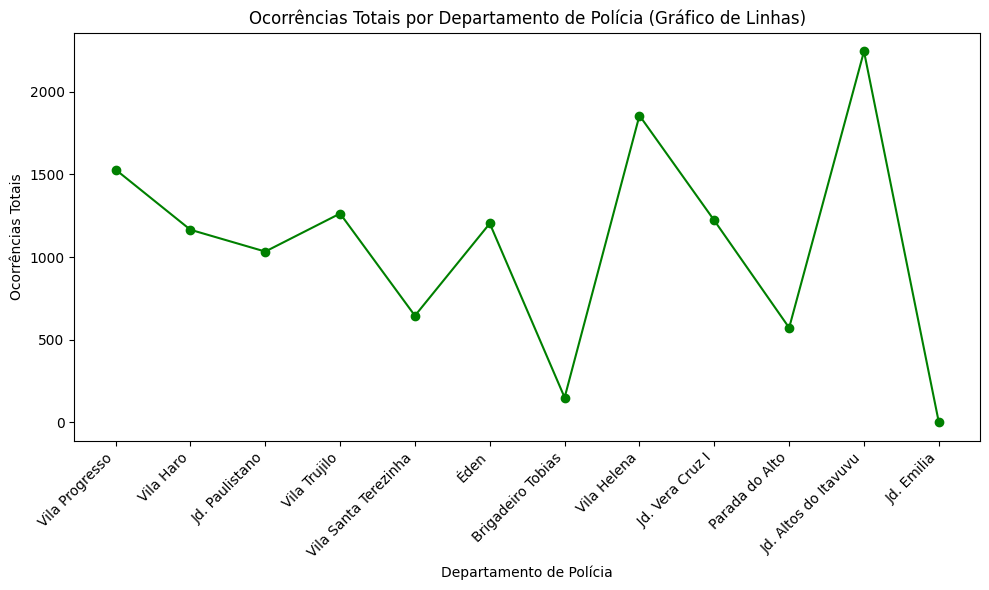

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(dataframe_ocorrencias['Bairros_Regiões'], dataframe_ocorrencias['Ocorrencias_Totais'], marker='o', color='green')
plt.xlabel('Departamento de Polícia')
plt.ylabel('Ocorrências Totais')
plt.title('Ocorrências Totais por Departamento de Polícia (Gráfico de Linhas)')
plt.xticks(rotation=45, ha="right")  # Rotaciona os rótulos no eixo X
plt.tight_layout()  # Ajuste para evitar sobreposição dos rótulos
plt.show()

# Gráfico de pizza

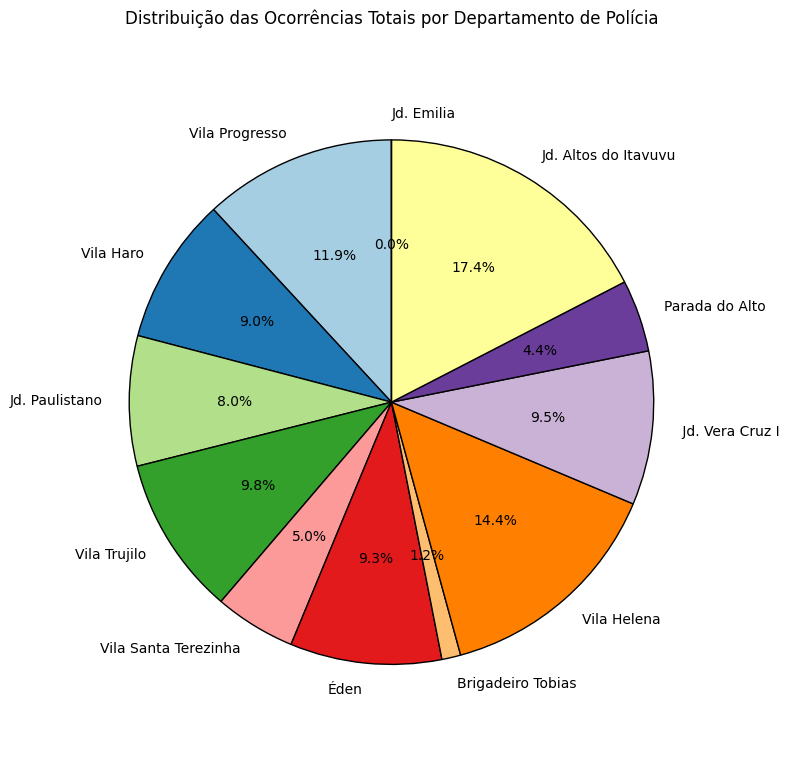

In [16]:
plt.figure(figsize=(8, 8))  # Tamanho do gráfico
plt.pie(dataframe_ocorrencias['Ocorrencias_Totais'],
        labels=dataframe_ocorrencias['Bairros_Regiões'],
        autopct='%1.1f%%',  # Exibir o percentual
        startangle=90,  # Iniciar o gráfico de cima
        colors=plt.cm.Paired.colors,  # Definir cores variadas
        wedgeprops={'edgecolor': 'black'}  # Definir bordas nas fatias
       )

plt.title('Distribuição das Ocorrências Totais por Departamento de Polícia')
plt.axis('equal')  # Garantir que o gráfico de pizza seja circular
plt.tight_layout()  # Ajustar o layout
plt.show()

# Gráfico de barra laterais

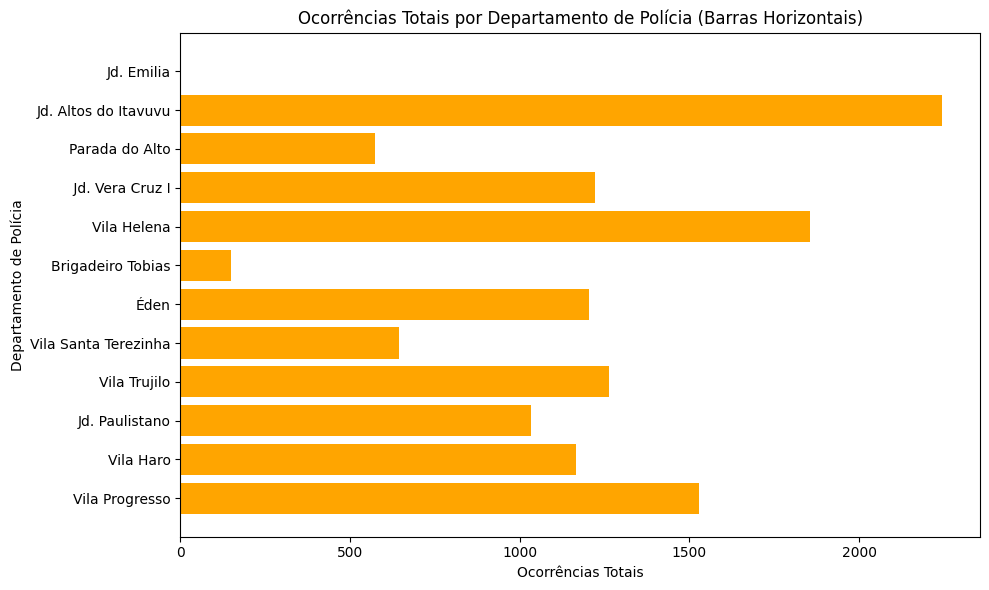

In [17]:
# Gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(dataframe_ocorrencias['Bairros_Regiões'], dataframe_ocorrencias['Ocorrencias_Totais'], color='orange')
plt.xlabel('Ocorrências Totais')
plt.ylabel('Departamento de Polícia')
plt.title('Ocorrências Totais por Departamento de Polícia (Barras Horizontais)')
plt.tight_layout()
plt.show()

## Conclusão

A segmentação das ocorrências por departamento de polícia proporciona uma nova perspectiva sobre a criminalidade, permitindo a divisão dos dados pelo número de ocorrências em diferentes regiões de Sorocaba. Como próximas etapas, buscamos compreender a estratégia de atendimento das ocorrências de cada departamento de polícia e, com base nesses dados, representar esses números por meio de um mapa de calor, segmentado pelas regiões de Sorocaba, incluindo também a cidade de Votorantim.